<a href="https://colab.research.google.com/github/angelaaaateng/ML_COVID_PREDICTION/blob/master/Exploration_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Final Project: COVID Prediction in the Philippines 


#### Team members: 

#### Overview: 

##### [Preprocessing](#preprocessing_cell): 
- [openrefine clustering/data cleaning] (done outside this notebook, see scripts) 
- [Symptoms + Other Diseases Feature Engineering](#preprocessing_symp_cell)
- [Symptops + Other Diseases one hot encoding](#preprocessing_sympoh_cell)
- [Epi_Link Feature engineering](#preprocessing_epilink_cell)
- [Dates feature engineering](#preprocessing_dates_cell)
- [Geo-location feature engineering (absolute location)](#preprocessing_geo_cell)  
- [Location feature engineering (zip)](#preprocessing_zip_cell) 
- [Location feature engineering (city)](#preprocessing_city_cell)
- [Population Featue engineering](#preprocessing_pop_cell)
- [Final data cleaning (numeric encoding, etc)](#preprocessing_final_cell)

Naming Convention: 
- Amber: data = main dataframe

##### [Analysis & Modeling](#analysis&modeling_cell)
- [Clustering](#clustering_cell)
- [Modeling](#modeling_cell)

## Import Libraries + Load Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
# amber additions
!pwd

/Users/laurendarinzo/Desktop/ML_COVID_PREDICTION


<a id='preprocessing_cell'></a>
# Data Preprocessing

**DSP Data (Key = PHCaseNo)**

In [471]:
data = pd.read_csv('openrefine_PHCASES_COVID_04162020_PHnum.csv')
data.head()

,Case No.,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History 1,Travel History 2,Travel History 3,Travel History 4,...,Date of Final Status (recovered/expired),Final Diagnosis,Age Group,Location,Location 1,Location 2,Latitude,Longitude,Residence Lat,Residence Long
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,NaN,NaN,NaN,...,Sun Mar 15 00:00:00 EDT 2020,NaN,31 - 40,Manila City,Manila City,NaN,14.613480,120.980950,14.598727,120.9819909
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,NaN,NaN,NaN,...,Sat Feb 01 00:00:00 EST 2020,severe pneumonia,41 - 50,Manila City,Manila City,NaN,14.613480,120.980950,14.598727,120.9819909
2,PH00003,F,60,chinese,None,Yes (China),china,NaN,NaN,NaN,...,Sun Mar 15 00:00:00 EDT 2020,NaN,51 - 60,Manila City,Manila City,NaN,14.615867,120.980991,14.598727,120.9819909
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,NaN,NaN,NaN,...,Thu Mar 19 00:00:00 EDT 2020,"asymptomatic, negative test result",41 - 50,Taguig City,Taguig City,NaN,14.606904,121.020392,14.517274,121.0496133
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,NaN,NaN,NaN,...,Thu Mar 12 00:00:00 EDT 2020,"acute respiratory distress syndrome, severe pn...",61 - 70,"Cainta, Rizal",Cainta,Rizal,14.409635,121.037425,14.586506,121.1138255


In [472]:
data.columns

Index(['Case No.', 'Sex', 'Age', 'Nationality', 'Residence in the Philippines',
       'History of Travel / Exposure', 'Travel History 1', 'Travel History 2',
       'Travel History 3', 'Travel History 4', 'Epi_Link',
       'Date of Onset of Symptoms', 'Date of Admission',
       'Date of Lab Confirmation', 'Date of Announcement to the Public',
       'Admission / Consultation', 'Symptoms', 'Other disease', 'Status',
       'Health Status', 'Date of Final Status (recovered/expired)',
       'Final Diagnosis', 'Age Group', 'Location', 'Location 1', 'Location 2',
       'Latitude', 'Longitude', 'Residence Lat', 'Residence Long'],
      dtype='object')

In [473]:
data = data.rename(columns={'Case No.': 'phcaseno', 'Travel History 1': 'Travel History'})

In [474]:
# data.dtypes

In [475]:
data.shape

(3246, 30)

In [476]:
# target variable information (before clustering)
data.groupby('Health Status').size()

Health Status
asymptomatic        38
critical             3
died               108
for validation    2983
mild                57
recovered           51
severe               6
dtype: int64

In [477]:
data['Other disease']=data['Other disease'].str.replace('  ',' ')
data['Other disease']=data['Other disease'].str.replace(', ',',')
data['Other disease']=data['Other disease'].str.replace(' ,',',')
data['Other disease']=data['Other disease'].str.replace('diabetes','diabetes')
data['Other disease']=data['Other disease'].str.replace('renal disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('acute kidney injury','acute kidney injury')
data['Other disease']=data['Other disease'].str.replace('asthma','asthma')
data['Other disease']=data['Other disease'].str.replace('atherosclerosis','atherosclerosis')
data['Other disease']=data['Other disease'].str.replace('atherosclerotic cardiovascular disease','atherosclerosis')
data['Other disease']=data['Other disease'].str.replace('benign prostatic hyperplasia','benign prostatic hyperplasia')
data['Other disease']=data['Other disease'].str.replace('benign prostatic hypertrophy','benign prostatic hyperplasia')
data['Other disease']=data['Other disease'].str.replace('bronchial asthma','asthma')
data['Other disease']=data['Other disease'].str.replace('cardiac disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('cardiac dysrhythmia','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('cardiomyopathy','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('cardiovascular disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('cerebrovascular accident infarc','cerebrovascular disease infarction')
data['Other disease']=data['Other disease'].str.replace('cerebrovascular disease infarction','cerebrovascular disease infarction')
data['Other disease']=data['Other disease'].str.replace('chronic kidney disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('chronic obstructive pulmonary disease','chronic obstructive pulmonary disease')
data['Other disease']=data['Other disease'].str.replace('colon cancer','colon cancer')
data['Other disease']=data['Other disease'].str.replace('coronary artery disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('coronary heart disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('dengue','dengue')
data['Other disease']=data['Other disease'].str.replace('diabetes mellitus','diabetes')
data['Other disease']=data['Other disease'].str.replace('diabetes','diabetes')
data['Other disease']=data['Other disease'].str.replace('diabetic ketoacidosis','diabetes')
data['Other disease']=data['Other disease'].str.replace('diabetic nephropathy','diabetes')
data['Other disease']=data['Other disease'].str.replace('diabetis mellitus','diabetes')
data['Other disease']=data['Other disease'].str.replace('dyslipidemia','dyslipidemia')
data['Other disease']=data['Other disease'].str.replace('endocrine condition','endocrine condition')
data['Other disease']=data['Other disease'].str.replace('hypertension','hypertension')
data['Other disease']=data['Other disease'].str.replace('hypertensioncardiovascular disease','hypertension,cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('hypertensive cardiovascular disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('hypertensive nephrosclerosis','renal disease')
data['Other disease']=data['Other disease'].str.replace('hyperthyroidism','hyperthyroidism')
data['Other disease']=data['Other disease'].str.replace('hypothyroidism','hypothyroidism')
data['Other disease']=data['Other disease'].str.replace('impaired fasting glucose','impaired fasting glucose')
data['Other disease']=data['Other disease'].str.replace('ischemic heart disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('kidney disease secondary tohypertension nephrosclerosis','renal disease')
data['Other disease']=data['Other disease'].str.replace('kidney disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('peripheral arterial occlusive disease','peripheral arterial occlusive disease')
data['Other disease']=data['Other disease'].str.replace('renal disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('tongue cancer','tongue cancer')
data['Other disease']=data['Other disease'].str.replace('valvular heart disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('acute kidney injury secondary to pre-renal azotemia','acute renal failure')
data['Other disease']=data['Other disease'].str.replace('acute kidney injury','acute kidney injury')
data['Other disease']=data['Other disease'].str.replace('acute renal failure','acute renal failure')
data['Other disease']=data['Other disease'].str.replace('acute renal failure,cardiovascular disease,cardiovascular disease,diabetes mellitus','acute renal failure,cardiovascular disease,cardiovascular disease,diabetes')
data['Other disease']=data['Other disease'].str.replace('asthma','asthma')
data['Other disease']=data['Other disease'].str.replace('asymptomatic','asymptomatic')
data['Other disease']=data['Other disease'].str.replace('breast cancer','breast cancer')
data['Other disease']=data['Other disease'].str.replace('bronchial asthma','asthma')
data['Other disease']=data['Other disease'].str.replace('bronchialasthma','asthma')
data['Other disease']=data['Other disease'].str.replace('cardiac disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('chronic kidney disease secondary to hypertension nephrosclerosis','renal disease')
data['Other disease']=data['Other disease'].str.replace('chronic kidney disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('chronic obstructive pulmonary disease','chronic obstructive pulmonary disease')
data['Other disease']=data['Other disease'].str.replace('community-acquired pneumonia','community-acquired pneumonia')
data['Other disease']=data['Other disease'].str.replace('diabetes','diabetes')
data['Other disease']=data['Other disease'].str.replace('diabetes,hypertensioncardiovascular disease,renal disease,diabetes','diabetes,hypertension,cardiovascular disease,renal disease,diabetes')
data['Other disease']=data['Other disease'].str.replace('diabetis mellitus','diabetes')
data['Other disease']=data['Other disease'].str.replace('dis_renal disease secondary tohypertension nephrosclerosis','renal disease')
data['Other disease']=data['Other disease'].str.replace('hypertension','hypertension')
data['Other disease']=data['Other disease'].str.replace('hypertensive cardiovascular disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('hypertensive','hypertension')
data['Other disease']=data['Other disease'].str.replace('hyperthyroidism','hyperthyroidism')
data['Other disease']=data['Other disease'].str.replace('kidney disease secondary tohypertension nephrosclerosis','renal disease')
data['Other disease']=data['Other disease'].str.replace('myocarditis,diabetes,acute kidney injury,hypertension','cardiovascular disease,diabetes,acute kidney injury,hypertension')
data['Other disease']=data['Other disease'].str.replace('none','asymptomatic')
data['Other disease']=data['Other disease'].str.replace('none','none')
data['Other disease']=data['Other disease'].str.replace('permanent atrial fibrillation','permanent atrial fibrillation')
data['Other disease']=data['Other disease'].str.replace('prostatic cancer','prostatic cancer')
data['Other disease']=data['Other disease'].str.replace('remnal disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('renal disease secondary tohypertension nephrosclerosis','renal disease')
data['Other disease']=data['Other disease'].str.replace('renal disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('status post renal transplant','status post renal transplant')
data['Other disease']=data['Other disease'].str.replace('systemic lupus erythematosus','systemic lupus erythematosus')
data['Other disease']=data['Other disease'].str.replace('renal disease secondary to hypertension nephrosclerosis','renal disease,hypertension')
data['Other disease']=data['Other disease'].str.replace('with comorbid (not specified)','comorbid_unknown',regex=False)
data['Other disease']=data['Other disease'].str.replace('hypertensioncardiovascular disease','cardiovascular disease',regex=False)
data['Other disease']=data['Other disease'].str.replace('chronicrenal disease','renal disease',regex=False)
data['Symptoms']=data['Symptoms'].str.replace(' ,',',')
data['Symptoms']=data['Symptoms'].str.replace(', ',',')
data['Symptoms']=data['Symptoms'].str.replace('  ',' ')
data['Symptoms']=data['Symptoms'].str.replace('body malaise','body malaise')
data['Symptoms']=data['Symptoms'].str.replace('colds','colds')
data['Symptoms']=data['Symptoms'].str.replace('comorbidity','comorbidity')
data['Symptoms']=data['Symptoms'].str.replace('cough','cough')
data['Symptoms']=data['Symptoms'].str.replace('difficulty in breathing','dyspnea')
data['Symptoms']=data['Symptoms'].str.replace('dizziness','dizziness')
data['Symptoms']=data['Symptoms'].str.replace('dysphagia','dysphagia')
data['Symptoms']=data['Symptoms'].str.replace('headache','headache')
data['Symptoms']=data['Symptoms'].str.replace('shortness of breath','dyspnea')
data['Symptoms']=data['Symptoms'].str.replace('sore throat','sore throat')
data['Symptoms']=data['Symptoms'].str.replace('difficulty of breathing','dyspnea')


In [478]:
data.dtypes

phcaseno                                     object
Sex                                          object
Age                                           int64
Nationality                                  object
Residence in the Philippines                 object
History of Travel / Exposure                 object
Travel History                               object
Travel History 2                             object
Travel History 3                             object
Travel History 4                             object
Epi_Link                                     object
Date of Onset of Symptoms                    object
Date of Admission                            object
Date of Lab Confirmation                     object
Date of Announcement to the Public           object
Admission / Consultation                     object
Symptoms                                     object
Other disease                                object
Status                                       object
Health Statu

In [479]:
data.groupby('Other disease').size()

Other disease
acute kidney injury                                                                               2
acute kidney injury,benign prostatic hyperplasia                                                  1
acute kidney injury,hypertension,diabetes                                                         1
acute renal failure                                                                               1
acute renal failure,cardiovascular disease,cardiovascular disease,diabetes                        1
asthma                                                                                            3
asthma,diabetes                                                                                   1
asthma,hypertension,atherosclerosis,cardiovascular disease                                        1
asymptomatic                                                                                      8
breast cancer,diabetes                                                                

<a id='preprocessing_symp_cell'></a>
## Feature Engineering: Symptoms + Other Diseases

<a id='preprocessing_sympoh_cell'></a>
## One Hot Encoding: Symptoms + Other Diseases 

In [480]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Travel History 2,Travel History 3,Travel History 4,...,Date of Final Status (recovered/expired),Final Diagnosis,Age Group,Location,Location 1,Location 2,Latitude,Longitude,Residence Lat,Residence Long
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,NaN,NaN,NaN,...,Sun Mar 15 00:00:00 EDT 2020,NaN,31 - 40,Manila City,Manila City,NaN,14.613480,120.980950,14.598727,120.9819909
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,NaN,NaN,NaN,...,Sat Feb 01 00:00:00 EST 2020,severe pneumonia,41 - 50,Manila City,Manila City,NaN,14.613480,120.980950,14.598727,120.9819909
2,PH00003,F,60,chinese,None,Yes (China),china,NaN,NaN,NaN,...,Sun Mar 15 00:00:00 EDT 2020,NaN,51 - 60,Manila City,Manila City,NaN,14.615867,120.980991,14.598727,120.9819909
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,NaN,NaN,NaN,...,Thu Mar 19 00:00:00 EDT 2020,"asymptomatic, negative test result",41 - 50,Taguig City,Taguig City,NaN,14.606904,121.020392,14.517274,121.0496133
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,NaN,NaN,NaN,...,Thu Mar 12 00:00:00 EDT 2020,"acute respiratory distress syndrome, severe pn...",61 - 70,"Cainta, Rizal",Cainta,Rizal,14.409635,121.037425,14.586506,121.1138255


In [481]:
# drop empty columns
data = data.drop([    
 'Travel History 2',
 'Travel History 3',
 'Travel History 4'], axis = 1)

In [482]:
symptoms = data.set_index('phcaseno').Symptoms.str.split(',', expand=True).stack()

In [483]:
# symptoms 

In [484]:
symptoms= pd.get_dummies(symptoms, prefix='symp').groupby(level=0).sum()
# symptoms

In [485]:
# join it back to the original 
data = data.merge(symptoms, on=['phcaseno'], how='left', indicator=True)

In [486]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,symp_colds,symp_comorbidity,symp_cough,symp_dizziness,symp_dysphagia,symp_dyspnea,symp_fever,symp_headache,symp_sore throat,_merge
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,Wife of PH2,Tue Jan 21 00:00:00 EST 2020,Sat Jan 25 00:00:00 EST 2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,Husband of PH1,Sat Jan 18 00:00:00 EST 2020,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,both
2,PH00003,F,60,chinese,None,Yes (China),china,Traveled to Cebu and Bohol. Was already in Chi...,Tue Jan 21 00:00:00 EST 2020,Wed Jan 22 00:00:00 EST 2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,NaN,Tue Mar 03 00:00:00 EST 2020,Fri Mar 06 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,both
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,Husband of PH6,Tue Feb 25 00:00:00 EST 2020,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,both


In [487]:
#symptoms
#symptoms.to_csv(r'C:\Users\User\Downloads\df_symptoms.csv')

In [488]:
cols = ['symp_asymptomatic',
'symp_body malaise',
'symp_colds',
'symp_comorbidity',
'symp_cough',
'symp_dizziness',
'symp_dysphagia',
'symp_dyspnea',
'symp_fever',
'symp_headache',
'symp_sore throat'
]

In [489]:
data[cols] = data[cols].replace({np.nan:0.0})
data[cols] = data[cols].replace({2:1})

**Table with One Hot Encoded Symptoms** 

In [490]:
data = data.drop(['_merge'], axis =1)

In [491]:
data['Other disease'].values.tolist()
data = data.rename(columns={'Other disease':'other_disease'}, errors="raise")

In [492]:
disease = data.set_index('phcaseno').other_disease.str.split(',', expand=True).stack()
# disease

In [493]:
disease_all= pd.get_dummies(disease, prefix='dis').groupby(level=0).sum()
# disease_all

In [494]:
data = data.merge(disease_all, on=['phcaseno'], how='left', indicator=True)

In [495]:
#disease_all.to_csv(r'C:\Users\User\Downloads\df_disease.csv')

In [496]:
cols = ['dis_acute kidney injury',
'dis_acute renal failure',
'dis_asthma',
'dis_asymptomatic',
'dis_atherosclerosis',
'dis_benign prostatic hyperplasia',
'dis_breast cancer',
'dis_cardiovascular disease',
'dis_cerebrovascular disease infarction',
'dis_chronic obstructive pulmonary disease',
'dis_colon cancer',
'dis_community-acquired pneumonia',
'dis_dengue',
'dis_diabetes',
'dis_dyslipidemia',
'dis_endocrine condition',
'dis_hypertension',
'dis_hyperthyroidism',
'dis_hypothyroidism',
'dis_impaired fasting glucose',
'dis_peripheral arterial occlusive disease',
'dis_permanent atrial fibrillation',
'dis_prostatic cancer',
'dis_renal disease',
'dis_status post renal transplant',
'dis_systemic lupus erythematosus',
'dis_tongue cancer',
'dis_comorbid_unknown'
]

In [497]:
data[cols] = data[cols].replace({np.nan:0.0})
data[cols] = data[cols].replace({2:1})

In [498]:
data

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,dis_hypothyroidism,dis_impaired fasting glucose,dis_peripheral arterial occlusive disease,dis_permanent atrial fibrillation,dis_prostatic cancer,dis_renal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_tongue cancer,_merge
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,Wife of PH2,Tue Jan 21 00:00:00 EST 2020,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,Husband of PH1,Sat Jan 18 00:00:00 EST 2020,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
2,PH00003,F,60,chinese,None,Yes (China),china,Traveled to Cebu and Bohol. Was already in Chi...,Tue Jan 21 00:00:00 EST 2020,Wed Jan 22 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,NaN,Tue Mar 03 00:00:00 EST 2020,Fri Mar 06 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,Husband of PH6,Tue Feb 25 00:00:00 EST 2020,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,PH03242,F,65,filipino,For validation,0,for validation,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
3242,PH03243,F,24,filipino,For validation,0,for validation,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
3243,PH03244,M,48,filipino,For validation,0,for validation,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
3244,PH03245,M,67,filipino,For validation,0,for validation,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only


**The `symptoms` and `other_disease` columns have no been feature engineered.**

In [499]:
data = data.drop(['_merge'], axis = 1) 
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,dis_hyperthyroidism,dis_hypothyroidism,dis_impaired fasting glucose,dis_peripheral arterial occlusive disease,dis_permanent atrial fibrillation,dis_prostatic cancer,dis_renal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_tongue cancer
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,Wife of PH2,Tue Jan 21 00:00:00 EST 2020,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,Husband of PH1,Sat Jan 18 00:00:00 EST 2020,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PH00003,F,60,chinese,None,Yes (China),china,Traveled to Cebu and Bohol. Was already in Chi...,Tue Jan 21 00:00:00 EST 2020,Wed Jan 22 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,NaN,Tue Mar 03 00:00:00 EST 2020,Fri Mar 06 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,Husband of PH6,Tue Feb 25 00:00:00 EST 2020,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [501]:
data.shape

(3246, 66)

In [502]:
#data.to_csv(r'C:\Users\User\Downloads\data.csv')

<a id='preprocessing_epilink_cell'></a>
## Feature Engineering: EpiLink

In [40]:
#PREP
#make everything lowercase so words like Travel and travel are equivalent
data['Epi_Link']=data['Epi_Link'].str.lower()

#make NaNs strings since we are using boolean string comparison and I was getting weird errors
data['Epi_Link']=data['Epi_Link'].fillna("NaN") 

Exposure count
- Approach: For instances that aren't about travel or aren't really long (less than 50 characters), split on the comma, colon, or and and count

In [41]:
#epi link exposure
data['Epi_Link_Exposure']=0
for i in range(len(data)):
    if len(data['Epi_Link'][i]) < 50:
        data['Epi_Link'][i]=re.split('; |, | and', data['Epi_Link'][i])                                    
        data['Epi_Link_Exposure'][i] = len(data['Epi_Link'][i])
                                           
    #for now ignore instances that are about travel
    if'travel' in data['Epi_Link'][i]:
        data['Epi_Link_Exposure'][i] = 0 

<a id='preprocessing_dates_cell'></a>
## Feature Engineering: Dates

In [42]:
# data.columns.tolist()

In [43]:
data['Date of Onset of Symptoms'] = pd.to_datetime(data['Date of Onset of Symptoms'])
data['Date of Announcement to the Public'] = pd.to_datetime(data['Date of Announcement to the Public'])
data['Date of Final Status (recovered/expired)'] = pd.to_datetime(data['Date of Final Status (recovered/expired)'])

In [44]:
# add new column
data['disease_len_days'] = data['Date of Final Status (recovered/expired)'] - data['Date of Onset of Symptoms']

<a id='preprocessing_geo_cell'></a>
## Feature Engineering: Geo-location (absolute location)

In [45]:
# note: RUN THIS LAST, it takes forever to run

In [50]:
# %load_ext au totime
import pandas as pd

import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import matplotlib.pyplot as plt
import plotly_express as px
import tqdm
from tqdm import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
import time

import plotly_express as px

In [51]:
geolocator = Nominatim()
# geolocator = Nominatim(domain='localhost:8888/nominatim', scheme='http')
# geolocator=Nominatim(domain='localhost:8080', scheme='http')

In [52]:
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]), timeout = 100)
    time.sleep(1.5)
    print("Currently at index", df['phcaseno'], "/", len(df))
    return location.raw['address']

In [53]:
geolocator = geopy.Nominatim(user_agent='my-application')

In [1]:
# geo_address = data.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Latitude', lon_field='Longitude')

In [55]:
geo_address

0       {'hospital': 'San Lazaro Hospital', 'road': 'Q...
1       {'hospital': 'San Lazaro Hospital', 'road': 'Q...
2       {'public_building': 'Francisco Duque Hall', 'r...
3       {'hospital': 'University of the East - Ramon M...
4       {'hospital': 'Research Institute for Tropical ...
                              ...                        
3241    {'public_building': 'Francisco Duque Hall', 'r...
3242    {'public_building': 'Francisco Duque Hall', 'r...
3243    {'public_building': 'Francisco Duque Hall', 'r...
3244    {'public_building': 'Francisco Duque Hall', 'r...
3245    {'public_building': 'Francisco Duque Hall', 'r...
Length: 3246, dtype: object

In [56]:
len(data)

3246

In [58]:
data['geo_address'] = geo_address

In [88]:
temp_data = pd.read_csv('data_clean_w_addresses.csv')

In [90]:
# pulling address string from temp_data dataframe

data['address'] = temp_data['address']

In [91]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,dis_prostatic cancer,dis_remnal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),Epi_Link_Exposure,disease_len_days,geo_address,Travel History Binary,address
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,[wife of ph2],2020-01-21 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,53 days 23:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...",1,"San Lazaro Hospital, Quiricada Street, Baranga..."
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,[husband of ph1],2020-01-18 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,14 days 00:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...",1,"San Lazaro Hospital, Quiricada Street, Baranga..."
2,PH00003,F,60,chinese,None,Yes (China),china,traveled to cebu and bohol. was already in chi...,2020-01-21 00:00:00-05:00,Wed Jan 22 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0,53 days 23:00:00,"{'public_building': 'Francisco Duque Hall', 'r...",1,"Francisco Duque Hall, Tayuman Street, Santa Cr..."
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,[NaN],2020-03-03 00:00:00-05:00,Fri Mar 06 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,15 days 23:00:00,{'hospital': 'University of the East - Ramon M...,1,University of the East - Ramon Magsaysay Memor...
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,[husband of ph6],2020-02-25 00:00:00-05:00,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,15 days 23:00:00,{'hospital': 'Research Institute for Tropical ...,0,"Research Institute for Tropical Medicine, Corp..."


## Feature Engineering: Travel History

In [94]:
# function to convert Travel History to 3 classes
# -1 : No data for Travel History
# 0 : Did not travel outside of the Philippines
# 1 : Traveled abroad

def convert_travel_hist(series):
    if series.lower() == 'for validation':
        return -1
    elif series.lower() == 'none'or series.lower() == 'went to Greenhills':
        return 0
    else:
        return 1

In [95]:
data['Travel History Binary'] = data['Travel History'].apply(convert_travel_hist)

In [96]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,dis_prostatic cancer,dis_remnal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),Epi_Link_Exposure,disease_len_days,geo_address,address,Travel History Binary
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,[wife of ph2],2020-01-21 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,53 days 23:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,[husband of ph1],2020-01-18 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,14 days 00:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1
2,PH00003,F,60,chinese,None,Yes (China),china,traveled to cebu and bohol. was already in chi...,2020-01-21 00:00:00-05:00,Wed Jan 22 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0,53 days 23:00:00,"{'public_building': 'Francisco Duque Hall', 'r...","Francisco Duque Hall, Tayuman Street, Santa Cr...",1
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,[NaN],2020-03-03 00:00:00-05:00,Fri Mar 06 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,15 days 23:00:00,{'hospital': 'University of the East - Ramon M...,University of the East - Ramon Magsaysay Memor...,1
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,[husband of ph6],2020-02-25 00:00:00-05:00,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,15 days 23:00:00,{'hospital': 'Research Institute for Tropical ...,"Research Institute for Tropical Medicine, Corp...",0


## Feature Engineering: Population Income
Note: Average Income based on the region each patient lives in

In [122]:
def extract_region(series):
    if type(series) != str:
        return 
        
    if 'NCR' in series:
        return 'NCR'
    elif 'Cordillera Administrative Region' in series:
        return 'CAR'
    elif 'Ilocos' in series:
        return 'Ilocos'
    elif 'Cagayan Valley' in series:
        return 'Cagayan Valley'
    elif 'Central Luzon' in series:
        return 'Central Luzon'
    elif 'Calabarzon' in series:
        return 'Calabarzon'
    elif 'Bicol' in series:
        return 'Bicol'
    elif 'Western Visayas' in series:
        return 'Western Visayas'
    elif 'Central Visayas' in series:
        return 'Central Visayas'
    elif 'Eastern Visayas' in series:
        return 'Eastern Visayas'
    elif 'Zamboanga Peninsula' in series:
        return 'Zamboanga Peninsula'
    elif 'Northern Mindanao' in series:
        return 'Northern Mindanao'
    elif 'Davao' in series:
        return 'Davao'
    elif 'Soccsksargen' in series:
        return 'Soccsksargen'
    elif 'Caraga' in series:
        return 'Caraga'
    else:
        return 'Bangsamoro Autonomous Region in Muslim Mindanao'

In [104]:
data['address'][0]

'San Lazaro Hospital, Quiricada Street, Barangay 325, Manila, Third District, NCR, First District, Metro Manila, 1003, Philippines'

In [103]:
type(data['address'][0])

str

In [123]:
data['region_inc'] = data['address'].apply(extract_region)

In [125]:
#data.head()

In [129]:
# create a dataframe for income in different regions
# https://psa.gov.ph/content/annual-family-income-estimated-php-313-thousand-average-2018

region_income = {'region_inc': ['NCR', 'CAR', 'Illocos', 'Cagayan Valley', 'Central Luzon', 'Calabarzon', 'Bicol', 'Western Visayas',
                 'Central Visayas', 'Eastern Visayas', 'Zamboanga Peninsula', 'Northern Mindanao', 'Davao', 'Soccsksargen',
                 'Caraga', 'Bangsamoro Autonomous Region in Muslim Mindanao'],
       'average income (in thousand pesos)': [460, 354,287,265,334,384,235,266,308,227,228,250,268,242,243,161]}
income_data = pd.DataFrame(region_income)

In [130]:
data = data.merge(income_data, on='region_inc')

In [134]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),Epi_Link_Exposure,disease_len_days,geo_address,address,Travel History Binary,region_inc,average income (in thousand pesos)
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,[wife of ph2],2020-01-21 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,1,53 days 23:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,[husband of ph1],2020-01-18 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,1,14 days 00:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460
2,PH00003,F,60,chinese,None,Yes (China),china,traveled to cebu and bohol. was already in chi...,2020-01-21 00:00:00-05:00,Wed Jan 22 00:00:00 EST 2020,...,0.0,0.0,0.0,0,53 days 23:00:00,"{'public_building': 'Francisco Duque Hall', 'r...","Francisco Duque Hall, Tayuman Street, Santa Cr...",1,NCR,460
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,[NaN],2020-03-03 00:00:00-05:00,Fri Mar 06 00:00:00 EST 2020,...,0.0,0.0,0.0,1,15 days 23:00:00,{'hospital': 'University of the East - Ramon M...,University of the East - Ramon Magsaysay Memor...,1,NCR,460
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,[husband of ph6],2020-02-25 00:00:00-05:00,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,0.0,1,15 days 23:00:00,{'hospital': 'Research Institute for Tropical ...,"Research Institute for Tropical Medicine, Corp...",0,NCR,460


## Feature Engineering: Population Density
Note: Population density based on city where the patient lives in (If there's no data on the city, we use population density of the region instead)

In [139]:
# function to extract city out from json object

def get_just_city(series):
    
    city = series.get('city')
    if city == None:
        city = series.get('region')
    return city
    

In [140]:
# function to extract region out from json object

def get_just_region(series):
    region = series.get('region')
    return region

In [141]:
# create a new column called city

data['city'] = data['geo_address'].apply(get_just_city)

In [142]:
# create a new column called region

data['region'] = data['geo_address'].apply(get_just_region)

In [143]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,dis_with comorbid (not specified),Epi_Link_Exposure,disease_len_days,geo_address,address,Travel History Binary,region_inc,average income (in thousand pesos),city,region
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,[wife of ph2],2020-01-21 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,1,53 days 23:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460,Manila,Metro Manila
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,[husband of ph1],2020-01-18 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,1,14 days 00:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460,Manila,Metro Manila
2,PH00003,F,60,chinese,None,Yes (China),china,traveled to cebu and bohol. was already in chi...,2020-01-21 00:00:00-05:00,Wed Jan 22 00:00:00 EST 2020,...,0.0,0,53 days 23:00:00,"{'public_building': 'Francisco Duque Hall', 'r...","Francisco Duque Hall, Tayuman Street, Santa Cr...",1,NCR,460,Manila,Metro Manila
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,[NaN],2020-03-03 00:00:00-05:00,Fri Mar 06 00:00:00 EST 2020,...,0.0,1,15 days 23:00:00,{'hospital': 'University of the East - Ramon M...,University of the East - Ramon Magsaysay Memor...,1,NCR,460,Galas,Metro Manila
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,[husband of ph6],2020-02-25 00:00:00-05:00,Thu Mar 05 00:00:00 EST 2020,...,0.0,1,15 days 23:00:00,{'hospital': 'Research Institute for Tropical ...,"Research Institute for Tropical Medicine, Corp...",0,NCR,460,Muntinlupa,Metro Manila


In [161]:
# dataframe storing data about population density for different regions and city

pop_density = pd.read_csv('2015 Population Density_web.csv')

In [162]:
pop_density = pop_density.drop(columns=['Unnamed: 2'])
pop_density.columns = ['city', 'Population', 'Land Area (sq.km.)', 'Population Density']

In [163]:
pop_density.head()

,city,Population,Land Area (sq.km.),Population Density
0,Metro Manila,"12,877,253",619.54,"20,785"
1,Manila,"1,780,148",24.98,"71,263"
2,Quezon City,"2,936,116",171.71,"17,099"
3,Caloocan City,"1,583,978",55.8,"28,387"
4,Pasay,"416,522",13.97,"29,815"


In [164]:
final_data = pd.merge(data, pop_density, how='left')
final_data = final_data.drop(columns=['Population', 'Land Area (sq.km.)'])
final_data['Population Density'] = final_data['Population Density'].fillna(20785) 

# Done with Feature Engineering / Data Cleaning
#### Writing final_data dataframe to a csv file called 'data_clean.csv' 

In [39]:
final_data.to_csv('data_clean.csv')

------

<a id='preprocessing_final_cell'></a>
## Final Data Cleaning for Modeling:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
data_raw = pd.read_csv('data_clean.csv')
data_raw.columns


data_raw = data_raw.drop(['Unnamed: 0'], axis=1)

# remove for validation
data_clean = data_raw[data_raw['Health Status'] != "for validation"]
data_clean=data_clean.reset_index(drop=True)
data_clean.columns

Index(['phcaseno', 'Sex', 'Age', 'Nationality', 'Residence in the Philippines',
       'History of Travel / Exposure', 'Travel History', 'Epi_Link',
       'Date of Onset of Symptoms', 'Date of Admission',
       ...
       'Epi_Link_Exposure', 'disease_len_days', 'geo_address', 'address',
       'Travel History Binary', 'region_inc',
       'average income (in thousand pesos)', 'city', 'region',
       'Population Density'],
      dtype='object', length=118)

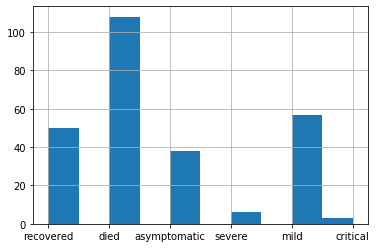

In [3]:
data_clean['Health Status'].hist()

In [4]:
# Sex -  M/F:
data_clean['Sex'] = pd.get_dummies(data_clean['Sex'])
data_clean['Sex'].value_counts() 

0    179
1     83
Name: Sex, dtype: int64

In [5]:
#print(data_clean['Nationality'].value_counts() )

def nationality_recode(series):
    if series != 'filipino':
        return 'other'
    else: 
        return 'filipino'

data_clean['Nationality'] = data_clean['Nationality'].apply(nationality_recode)
data_clean['Nationality'] = pd.get_dummies(data_clean['Nationality'])
data_clean['Nationality'].value_counts() 

1    241
0     21
Name: Nationality, dtype: int64

In [6]:
# disease_len_days cleaning - extract # days
data_clean['disease_len_days'] = data_clean["disease_len_days"].str.split(" ", 1, expand=True)[0]

In [7]:
data_clean['Population Density'] = data_clean.loc[:,'Population Density'].str.replace(',', '').astype(float)

In [8]:
data_clean=data_clean.drop(['phcaseno', 'History of Travel / Exposure', 'Travel History', 'Epi_Link', 'Date of Admission', 'Date of Lab Confirmation', 'Date of Admission', 'Symptoms', 'other_disease', 'Status', 'Date of Final Status (recovered/expired)', 'Final Diagnosis', 'Age Group', 'Location', 'Location 1', 'Location 2', 'Latitude', 'Longitude', 'Residence Lat', 'Residence Long', 'disease_len_days'], axis=1)

<a id='analysis&modeling_cell'></a>
# ANALYSIS & MODELING:

Libraries needed for analysis and modeling phase:

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
from math import floor

warnings.filterwarnings('ignore')

<a id='clustering_cell'></a>
## Clustering the target variable: 
Based on real-world application of results as well as underlying data.

In [10]:
def status_to_numeric(x):
    if x=='died':
        return 5
    if x=='critical':
        return 4
    if x=='severe':
        return 3
    if x=='mild':
        return 2
    if x=='asymptomatic':
        return 1
    if x=='recovered':
        return 0
    

data_clean['HealthStatusNUM'] = data_clean['Health Status'].apply(status_to_numeric)

In [11]:
# # split data using dates into train, val, test using most recent dates for test:
# train_pct, val_pct, test_pct = 0.6, 0.2, 0.2
# train_num, val_num, test_num = floor(data_clean.shape[0]*train_pct), floor(data_clean.shape[0]*val_pct), floor(data_clean.shape[0]*test_pct)

# train = data_clean.sort_values('Date of Onset of Symptoms', ascending=True).iloc[:train_num,:]
# train=train.reset_index(drop=True)

# val = data_clean.sort_values('Date of Onset of Symptoms', ascending=True).iloc[train_num:train_num+val_num,:]
# val=val.reset_index(drop=True)

# test = data_clean.sort_values('Date of Onset of Symptoms', ascending=True).iloc[train_num+val_num:train_num+val_num+test_num+1,:]
# test=test.reset_index(drop=True)

In [12]:
 train, val, test = np.split(data_clean.sample(frac=1), [int(.6*len(data_clean)), int(.8*len(data_clean))])

In [13]:
train=train.reset_index(drop=True)
val=val.reset_index(drop=True)
test=test.reset_index(drop=True)

In [14]:
# begin clustering using train data

data_numeric = train.select_dtypes(include=['float', 'int'])
data_numeric = data_numeric.drop('HealthStatusNUM', axis=1)
data_numeric = StandardScaler().fit_transform(data_numeric)

In [15]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=6)
    kmeans.fit(data_numeric)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

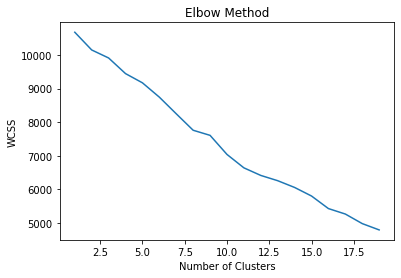

In [16]:
#Plot the elbow method to see if we found the optimal number of clusters
import matplotlib.pyplot as plt 

#fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15,8))
plt.plot(range(1,20), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

In [92]:
# Going to try with 12 clusters to start
status_kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=10, n_init=10, random_state=42)
status_cluster = status_kmeans.fit_predict(data_numeric)

In [93]:
pd.DataFrame(train)['Cluster'] = pd.DataFrame(status_cluster)

[Text(0, 0, 'None'),
 Text(0, 0, 'recovered'),
 Text(0, 0, 'asymptomatic'),
 Text(0, 0, 'mild'),
 Text(0, 0, 'severe'),
 Text(0, 0, 'critical'),
 Text(0, 0, 'died')]

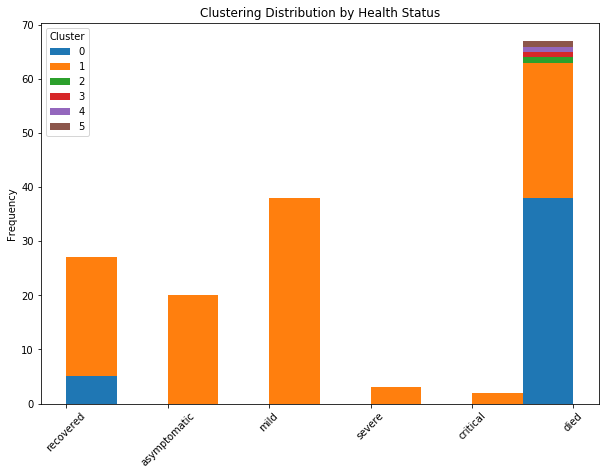

In [111]:
plt.rcParams['figure.figsize'] = [10,7]
cluster_plot = train.pivot(columns='Cluster').HealthStatusNUM.plot(kind = 'hist', stacked=True, title='Clustering Distribution by Health Status')
labels=['None', 'recovered', 'asymptomatic','mild','severe','critical','died']
cluster_plot.set_xticklabels(labels, rotation=45)

0    85
1    72
Name: Health Status Binary, dtype: int64

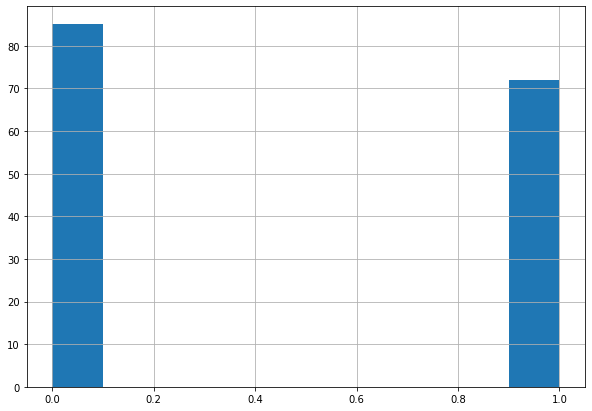

In [114]:
# recode to 2 categories based on the graph above as well as "business understanding":

def health_status_binary(series):
    if series > 2:
        return 1
    else:
        return 0
    
train['Health Status Binary'] = train['HealthStatusNUM'].apply(health_status_binary)
val['Health Status Binary'] = val['HealthStatusNUM'].apply(health_status_binary)
test['Health Status Binary'] = test['HealthStatusNUM'].apply(health_status_binary)

train['Health Status Binary'].hist()
train['Health Status Binary'].value_counts()

Standardize the feature data for modeling:

In [248]:
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer


imp = SimpleImputer(strategy="mean")
standardize = preprocessing.StandardScaler()
cols_drop = ['Health Status Binary','HealthStatusNUM', 'Health Status', 'Date of Onset of Symptoms']

X_train, y_train = train.drop(cols_drop, axis=1), train['Health Status Binary']
X_val, y_val = val.drop(cols_drop, axis=1), val['Health Status Binary']
X_test, y_test = test.drop(cols_drop, axis=1), test['Health Status Binary']

X_train = X_train.select_dtypes(include=['float', 'int64'])
X_val = X_val.select_dtypes(include=['float', 'int64'])
X_test = X_test.select_dtypes(include=['float', 'int64'])

X_train = standardize.fit_transform(imp.fit_transform(X_train))
X_val = standardize.fit_transform(imp.fit_transform(X_val))
X_test = standardize.fit_transform(imp.fit_transform(X_test))

<a id='modeling_cell'></a>
## Modeling:

NAIVE BAYES:

In [249]:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_val)

In [250]:

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_val, y_pred))

cm = metrics.confusion_matrix(y_val, y_pred)
cm 

Accuracy: 0.5


array([[ 7, 25],
       [ 1, 19]])

## Trees:

DECISION TREE:

In [251]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_val) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_val, dtree_predictions)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_val, dtree_predictions))
dtree_model.score(X_val,  y_val)

[[30  2]
 [12  8]]
Accuracy: 0.7307692307692307


0.7307692307692307

In [252]:
feature_importance = dtree_model.feature_importances_
print(np.count_nonzero(feature_importance))
important_features = np.argsort(feature_importance)
important_features = important_features[-9:]
important_features

8


array([27, 80, 83, 66, 15, 82, 69, 38,  0])

In [253]:
train.iloc[:,important_features].columns 
# TO DO: test with just these for more advanced models


Index(['dis_ asthma', 'dis_hyperthyroidism',
       'dis_permanent atrial fibrillation', 'dis_acute renal failure',
       'symp_ headache', 'dis_none', 'dis_breast cancer',
       'dis_ cerebrovascular disease infarction', 'Sex'],
      dtype='object')

RANDOM FOREST:

In [254]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0) 
clf.fit(X_train, y_train)
rf_preds = clf.predict(X_val)
cm = confusion_matrix(y_val, rf_preds)
print(cm)
clf.score(X_val,  y_val)

[[32  0]
 [ 9 11]]


0.8269230769230769

XGBoost:

In [255]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_val)
cm = confusion_matrix(y_val, y_preds)
print(cm)
model.score(X_val,  y_val)

[[31  1]
 [ 7 13]]


0.8461538461538461

## Linear models: 

In [256]:
# SVM: 

# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_val) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_val, y_val) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_val, svm_predictions) 
cm

print(accuracy)
# choose logreg

0.8846153846153846


Logistic Regression

In [257]:

# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.90


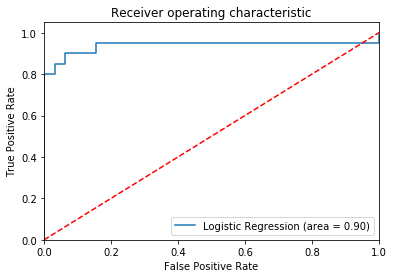

In [258]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_val, logreg.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, logreg.predict_proba(X_val)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [259]:
# KNN

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_val, y_val) 
print(accuracy)
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_val)  
cm = confusion_matrix(y_val, knn_predictions)

0.8269230769230769


Neural Network: 

In [114]:
# Neural Network References:
# https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/
# https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

# new binary: https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

In [35]:
X_train.shape

(157, 86)

In [116]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_val, y_val)
print('Accuracy: %.2f' % (accuracy*100))

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/150
157/157 [==============================] - 0s 1ms/step - loss: 0.7232 - accuracy: 0.5605
Epoch 2/150
157/157 [==============================] - 0s 153us/step - loss: 0.6779 - accuracy: 0.6369
Epoch 3/150
157/157 [==============================] - 0s 180us/step - loss: 0.6416 - accuracy: 0.6879
Epoch 4/150
157/157 [==============================] - 0s 189us/step - loss: 0.6104 - accuracy: 0.7325
Epoch 5/150
157/157 [==============================] - 0s 149us/step - loss: 0.5804 - accuracy: 0.7707
Epoch 6/150
157/157 [==============================] - 0s 124us/step - loss: 0.5504 - accuracy: 0.8025
Epoch 7/150
157/157 [==============================] - 0s 127us/step - loss: 0.5204 - accuracy: 0.8025
Epoch 8/150
157/157 [==============================] - 0s 122us/step - loss: 0.4918 - accuracy: 0.8217
Epoch 9/150
157/157 [==============================] - 0s 264us/step - loss: 0.4617

Model Performance of XGBoost and Random Forest on Subet of Features:

In [260]:
imp = SimpleImputer(strategy="mean")
standardize = preprocessing.StandardScaler()
cols_drop = ['Health Status Binary']

train_f=train.iloc[:,np.append(important_features, 100)]
val_f=val.iloc[:,np.append(important_features, 99)]
test_f=test.iloc[:,np.append(important_features, 99)]

X_train, y_train = train_f.drop(cols_drop, axis=1), train['Health Status Binary']
X_val, y_val = val_f.drop(cols_drop, axis=1), val['Health Status Binary']
X_test, y_test = test_f.drop(cols_drop, axis=1), test['Health Status Binary']

X_train = X_train.select_dtypes(include=['float', 'int64'])
X_val = X_val.select_dtypes(include=['float', 'int64'])
X_test = X_test.select_dtypes(include=['float', 'int64'])

X_train = standardize.fit_transform(imp.fit_transform(X_train))
X_val = standardize.fit_transform(imp.fit_transform(X_val))
X_test = standardize.fit_transform(imp.fit_transform(X_test))

In [263]:
#Random Forest
clf = RandomForestClassifier(max_depth=10, random_state=0) 
clf.fit(X_train, y_train)
rf_preds = clf.predict(X_val)
cm = confusion_matrix(y_val, rf_preds)
print(cm)
clf.score(X_val,  y_val)

[[32  0]
 [20  0]]


0.6153846153846154

In [264]:
#XGBoost
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_val)
cm = confusion_matrix(y_val, y_preds)
print(cm)
model.score(X_val,  y_val)

[[32  0]
 [20  0]]


0.6153846153846154

Feature selection resulted in worse accuracy

Hyperparameter Tuning -- going back to original train 
Adapted from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [265]:
imp = SimpleImputer(strategy="mean")
standardize = preprocessing.StandardScaler()
cols_drop = ['Health Status Binary','HealthStatusNUM', 'Health Status', 'Date of Onset of Symptoms']

X_train, y_train = train.drop(cols_drop, axis=1), train['Health Status Binary']
X_val, y_val = val.drop(cols_drop, axis=1), val['Health Status Binary']
X_test, y_test = test.drop(cols_drop, axis=1), test['Health Status Binary']

X_train = X_train.select_dtypes(include=['float', 'int64'])
X_val = X_val.select_dtypes(include=['float', 'int64'])
X_test = X_test.select_dtypes(include=['float', 'int64'])

X_train = standardize.fit_transform(imp.fit_transform(X_train))
X_val = standardize.fit_transform(imp.fit_transform(X_val))
X_test = standardize.fit_transform(imp.fit_transform(X_test))

In [267]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [268]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [269]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [271]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=2000, min_samples_leaf=1) 
clf.fit(X_train, y_train)
rf_preds = clf.predict(X_val)
cm = confusion_matrix(y_val, rf_preds)
print(cm)
clf.score(X_val,  y_val)

[[31  1]
 [ 6 14]]


0.8653846153846154

Improved by 0.04! 